# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")


# Reading Dataset

In [2]:
df= pd.read_csv('disaster_data_1991_2021.csv',encoding='latin',low_memory=False)

# Dataset Summary

In [3]:
df.shape

(18994, 51)

#### Data set has 18994 observations and 51 features.

In [4]:
df.head()

,Dis No,Year,population,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1991-0296-AUT,1991,7754891,296,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,...,NaN,NaN,NaN,82000.0,163149.0,50.260853,NaN,NaN,NaN,NaN
1,1991-0498-AFG,1991,13299016,498,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,...,NaN,NaN,NaN,NaN,NaN,50.260853,NaN,NaN,NaN,NaN
2,1991-0520-AUT,1991,7754891,520,NaN,Natural,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,...,NaN,NaN,NaN,28000.0,55709.0,50.260853,NaN,NaN,NaN,NaN
3,1991-0123-CHN,1991,1150780000,123,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,...,NaN,NaN,NaN,7500000.0,14922150.0,50.260853,NaN,NaN,NaN,NaN
4,1991-0209-CRI,1991,3202083,209,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,...,NaN,NaN,NaN,NaN,NaN,50.260853,NaN,NaN,NaN,NaN


#### Dataset contains information of natural Disasters across continents over the period of 30 years starting from 1991 to 2021.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18994 entries, 0 to 18993
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     18994 non-null  object 
 1   Year                                       18994 non-null  int64  
 2   population                                 18903 non-null  object 
 3   Seq                                        18994 non-null  int64  
 4   Glide                                      1647 non-null   object 
 5   Disaster Group                             18994 non-null  object 
 6   Disaster Subgroup                          18994 non-null  object 
 7   Disaster Type                              18994 non-null  object 
 8   Disaster Subtype                           17142 non-null  object 
 9   Disaster Subsubtype                        903 non-null    object 
 10  Event Name            

#### Dataset contains 22 numerical columns and 29 categorical columns

In [6]:
df.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,...,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI
count,18994.000000,18994.000000,6.880000e+02,4.062000e+03,18994.000000,18892.000000,16968.000000,18994.000000,18710.000000,17043.000000,...,8.124000e+03,1.952000e+03,1.365300e+04,3.500000e+01,3.500000e+01,9.750000e+02,9.750000e+02,4.029000e+03,4.029000e+03,18994.000000
mean,2006.108824,581.731494,1.234790e+05,6.528249e+04,2006.113931,6.509210,15.310820,2006.144309,6.604971,15.737429,...,7.492143e+05,5.939279e+04,4.549134e+05,2.257366e+06,3.139649e+06,9.406391e+05,1.195874e+06,9.162044e+05,1.192183e+06,74.008589
std,8.300946,1454.021903,2.973816e+06,7.080932e+05,8.301426,3.415219,8.929079,8.307665,3.388515,8.868188,...,7.848023e+06,5.168749e+05,6.136620e+06,4.940062e+06,7.628739e+06,3.460856e+06,4.334991e+06,5.501623e+06,7.111340e+06,13.505288
min,1991.000000,1.000000,1.000000e+00,-5.700000e+01,1991.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,8.400000e+01,1.170000e+02,3.400000e+01,4.200000e+01,2.000000e+00,2.000000e+00,50.260853
25%,2000.000000,171.000000,1.750000e+02,2.400000e+01,2000.000000,4.000000,8.000000,2000.000000,4.000000,8.000000,...,6.250000e+02,4.615000e+02,4.400000e+01,1.647450e+04,2.401700e+04,5.950000e+04,8.564600e+04,1.000000e+04,1.573600e+04,63.549547
50%,2006.000000,347.000000,7.245000e+02,2.035000e+02,2006.000000,7.000000,15.000000,2006.000000,7.000000,16.000000,...,6.430000e+03,2.400000e+03,9.000000e+02,1.940000e+05,2.391570e+05,2.000000e+05,2.613740e+05,8.703800e+04,1.132700e+05,74.396387
75%,2013.000000,520.000000,3.511000e+03,2.011900e+04,2013.000000,9.000000,23.000000,2013.000000,9.000000,23.000000,...,6.113825e+04,1.197975e+04,1.647000e+04,1.789032e+06,1.884216e+06,6.000000e+05,8.054980e+05,4.100000e+05,5.500000e+05,85.971642
max,2021.000000,9881.000000,7.800000e+07,4.000000e+07,2021.000000,12.000000,31.000000,2022.000000,12.000000,31.000000,...,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,4.066782e+07,6.000000e+07,8.325076e+07,2.100000e+08,2.529734e+08,100.000000


In [7]:
df.isna().sum()

Dis No                                           0
Year                                             0
population                                      91
Seq                                              0
Glide                                        17347
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                              1852
Disaster Subsubtype                          18091
Event Name                                   12824
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                      1014
Origin                                       15052
Associated Dis                               15816
Associated Dis2                              18307
OFDA Response                  

#### Out of 51 features 13 features have no null values and remaining 38 features have null values

### Since we are considering only Natural Disaster dropping technological and Extra Terrestrial under Disaster Subgroup feature

In [8]:
index =df[(df['Disaster Subgroup']=='Technological') | (df['Disaster Subgroup']=='Complex Disasters')].index
#Taking backup of rows to be dropped to a new dataframe
df_nonnatural =df[(df['Disaster Subgroup']=='Technological') | (df['Disaster Subgroup']=='Complex Disasters')]
df=df.drop(index=index)

#### Due to removal of above data, data set rows has been reduced by 7251 to 11743 observations

### Population is stored as object and coverting to interger

In [9]:
df['population']=pd.to_numeric(df['population'],errors='coerce')
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11743 entries, 0 to 18993
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     11743 non-null  object 
 1   Year                                       11743 non-null  int64  
 2   population                                 11669 non-null  float64
 3   Seq                                        11743 non-null  int64  
 4   Glide                                      1611 non-null   object 
 5   Disaster Group                             11743 non-null  object 
 6   Disaster Subgroup                          11743 non-null  object 
 7   Disaster Type                              11743 non-null  object 
 8   Disaster Subtype                           9896 non-null   object 
 9   Disaster Subsubtype                        903 non-null    object 
 10  Event Name            

,Dis No,Year,population,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1991-0296-AUT,1991,7754891,296,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,...,NaN,NaN,NaN,82000,163149,50,NaN,NaN,NaN,NaN
1,1991-0498-AFG,1991,13299016,498,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,...,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN
2,1991-0520-AUT,1991,7754891,520,NaN,Natural,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,...,NaN,NaN,NaN,28000,55709,50,NaN,NaN,NaN,NaN
3,1991-0123-CHN,1991,1150780000,123,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,...,NaN,NaN,NaN,7500000,14922150,50,NaN,NaN,NaN,NaN
4,1991-0209-CRI,1991,3202083,209,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,...,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN


#### population data has been converted to float

# Exploratory Data Analysis

## Univariate Analysis

### No of Disasters Continent wise

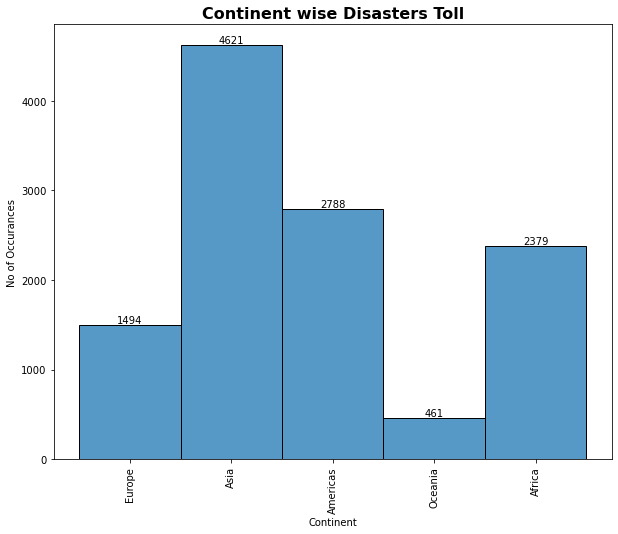

In [10]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data=df['Continent'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Continent wise Disasters Toll',fontweight='bold',fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('No of Occurances')
plt.show()

#### Asia is having largest no of disasters and Oceania is having the lowest number of disasters. This can be attributed to land mass size of Asia being the largest and Oceania being the least.

### Distribution of Numerical Data

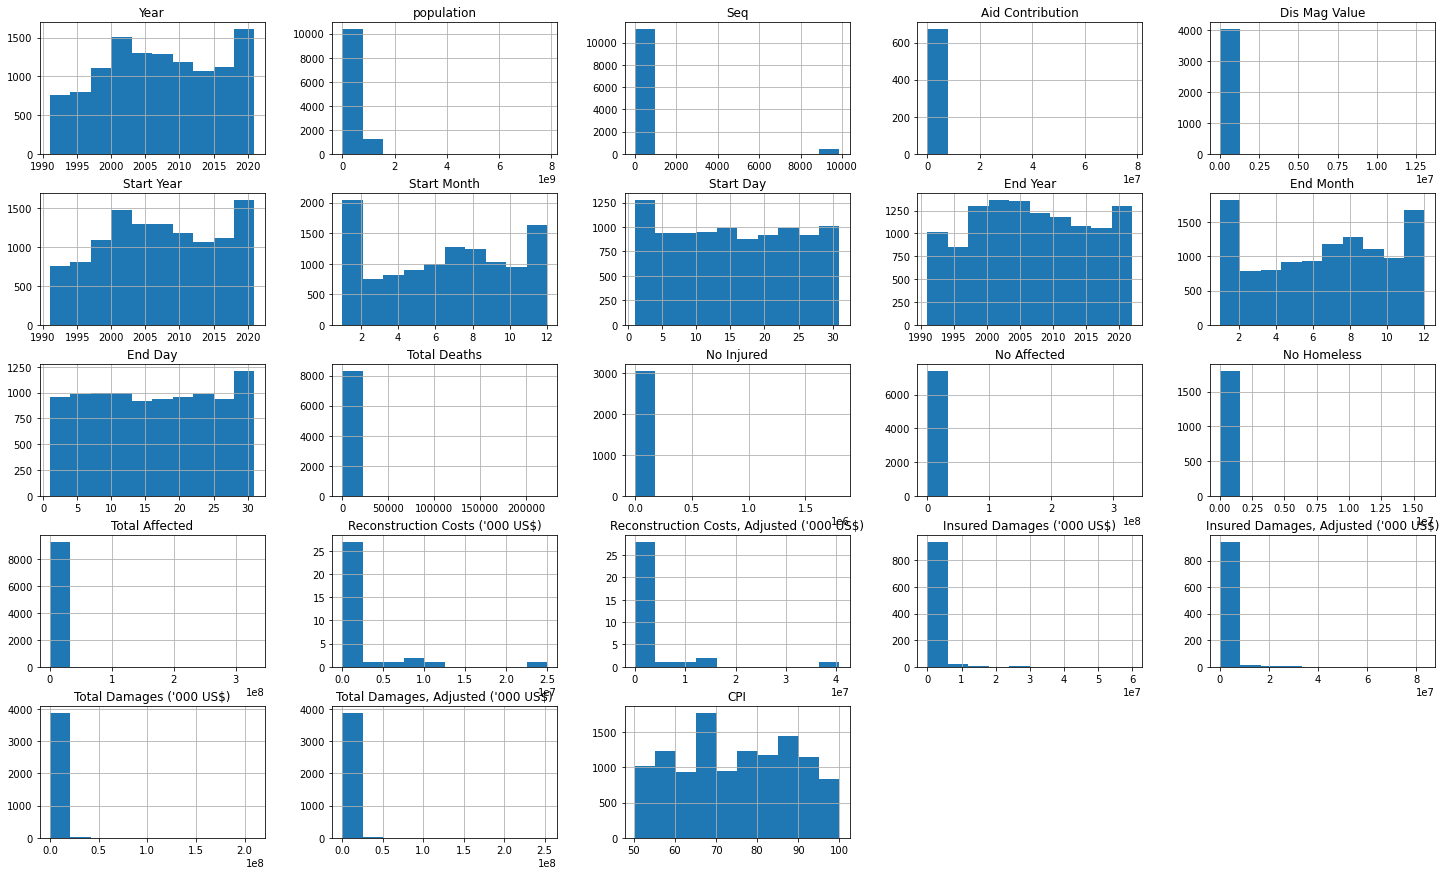

In [11]:
freq=df.select_dtypes('number')
freq.hist(figsize=(25,15))
plt.show()

#### This histogram shows the range of each numerical column values.

### Count of Disasters for each SubGroup

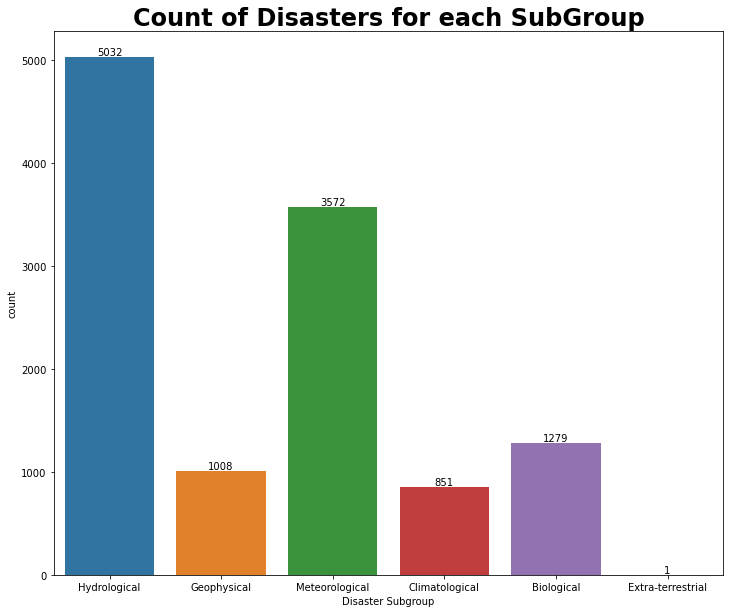

In [12]:
plt.figure(figsize=(12,10))
ax=sns.countplot(data=df,x='Disaster Subgroup')
for i in ax.containers:
    ax.bar_label(i,fmt='%d')

plt.title('Count of Disasters for each SubGroup',fontsize=24,fontweight='bold',color='black')

plt.show()

#### Found that the disaster count is more for Hydrological and very less for Extra Terrestrial

## Bivariate Analysis

### Total Death over the years

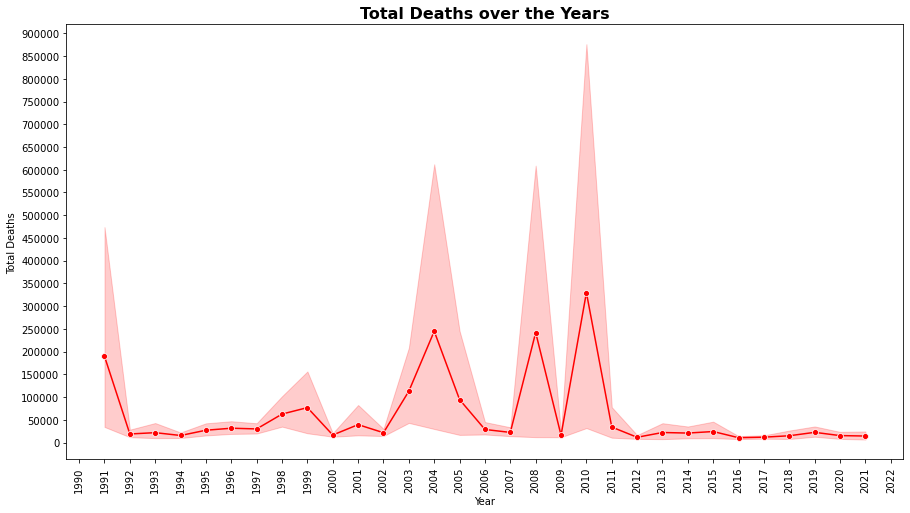

In [13]:
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df,x='Year',y='Total Deaths',estimator=lambda y:np.sum(y),color='red',marker='o',dashes=True)
plt.title('Total Deaths over the Years',fontsize=16,color='black',fontweight='bold')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
#start, end = ax.get_xlim()
#plt.xticks(np.arange(start,end-2,3),rotation=90)
plt.xticks(rotation=90)
plt.show()

### Total Affected over the years

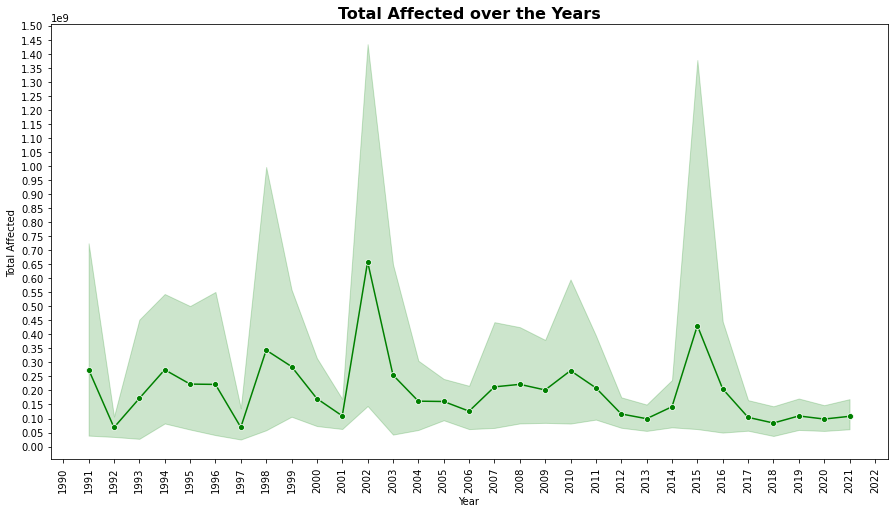

In [14]:
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df,x='Year',y='Total Affected',estimator=lambda y:np.sum(y),color='green',marker='o',dashes=True)
plt.title('Total Affected over the Years',fontsize=16,color='black',fontweight='bold')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50000000))
#for i in ax.containers:
    #x.bar_labels(i)
#start, end = ax.get_xlim()
#plt.xticks(np.arange(start,end-2,3),rotation=90)
plt.xticks(rotation=90)
plt.show()

### Total Affected % of Continents

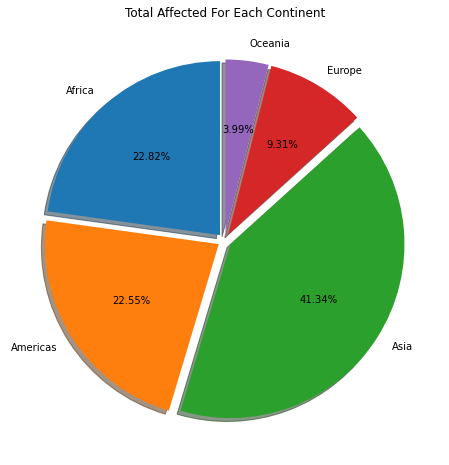

In [15]:
cont_data=df.groupby('Continent')['Total Affected'].count()
cont_data.plot.pie(y='Total Affected', figsize=(8, 8),autopct='%1.2f%%',title='Total Affected For Each Continent',
                       ylabel='',explode=(0.04, 0.04, 0.04,0.04,0.04),shadow=True, startangle=90)
plt.show()

### Cost Price Index Distribution Over the years due to Distasters

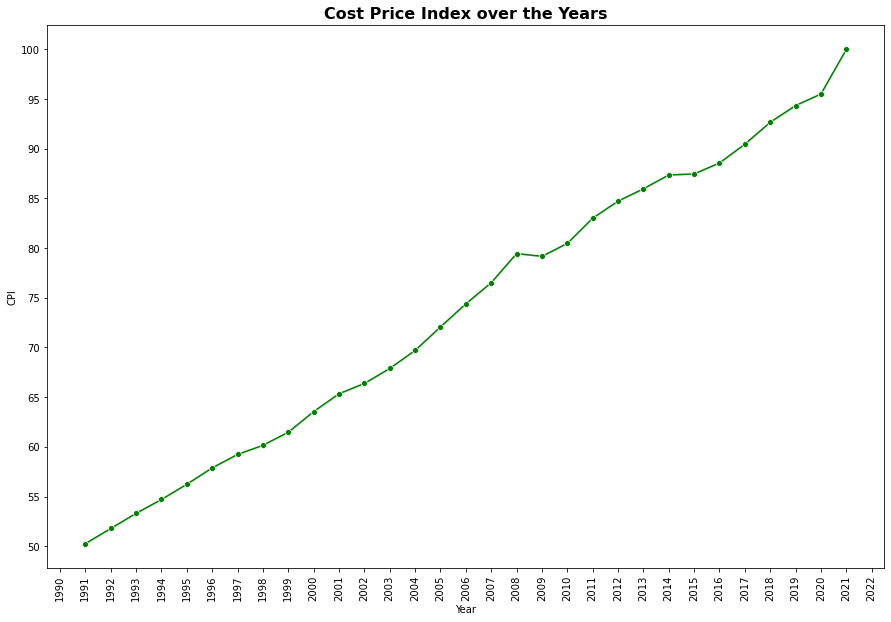

In [16]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,10))
ax=sns.lineplot(data=df,x='Year',y='CPI',color='green',estimator=np.mean,marker='o')
plt.title('Cost Price Index over the Years',fontsize=16,color='black',fontweight='bold')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
#for Year, CPI in zip(df['Year'], np.round(df['CPI'],2)):
    #ax.annotate(f'({Year}, {CPI})', xy=(Year, CPI))
    #ax.annotate(f'({CPI})', xy=(Year, CPI))
#start, end = ax.get_xlim()
#plt.xticks(np.arange(start,end-2,3),rotation=90)
plt.xticks(rotation=90)
plt.show()

### Disaster Subgroup Distribution over the years

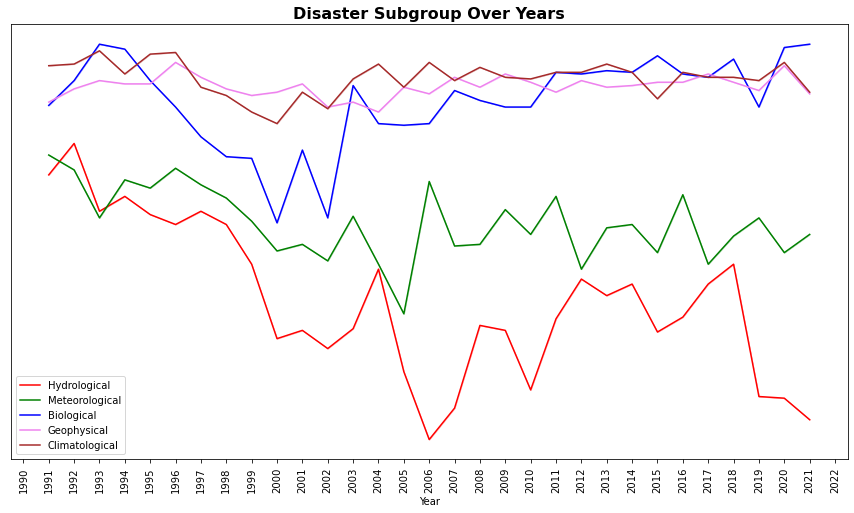

In [17]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df,x=df['Year'],y=df.loc[df['Disaster Subgroup']=='Hydrological','Disaster Subgroup'],color='red',estimator=lambda y:len(y),label='Hydrological')
ax=sns.lineplot(data=df,x=df['Year'],y=df.loc[df['Disaster Subgroup']=='Meteorological','Disaster Subgroup'],color='green',estimator=lambda y:len(y),label='Meteorological')
ax=sns.lineplot(data=df,x=df['Year'],y=df.loc[df['Disaster Subgroup']=='Biological','Disaster Subgroup'],color='blue',estimator=lambda y:len(y),label='Biological')
ax=sns.lineplot(data=df,x=df['Year'],y=df.loc[df['Disaster Subgroup']=='Geophysical','Disaster Subgroup'],color='violet',estimator=lambda y:len(y),label='Geophysical')
ax=sns.lineplot(data=df,x=df['Year'],y=df.loc[df['Disaster Subgroup']=='Climatological','Disaster Subgroup'],color='brown',estimator=lambda y:len(y),label='Climatological')
plt.title('Disaster Subgroup Over Years',fontsize=16,fontweight='bold')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#start, end = ax.get_xlim()
#plt.xticks(np.arange(start,end-2,3),rotation=90)
plt.xticks(rotation=90)
ax.axes.get_yaxis().set_visible(False)
#plt.show()

### Total Death Vs Total Affected Scatter Plot

Text(0.5, 1.0, 'Total Deaths vs Total Affected')

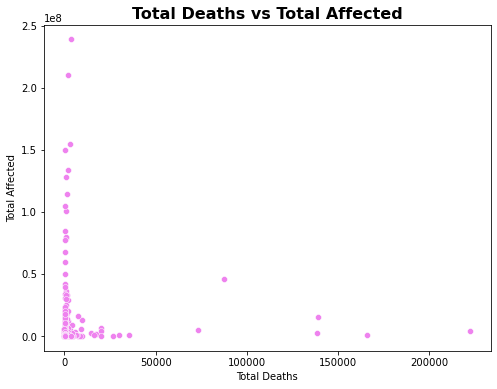

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Total Deaths'],y=df['Total Affected'],color='violet')
plt.title('Total Deaths vs Total Affected',fontweight='bold',fontsize=16)

## Multivariate Analysis

### Correlation Heatmap - Numerical Data

<AxesSubplot:>

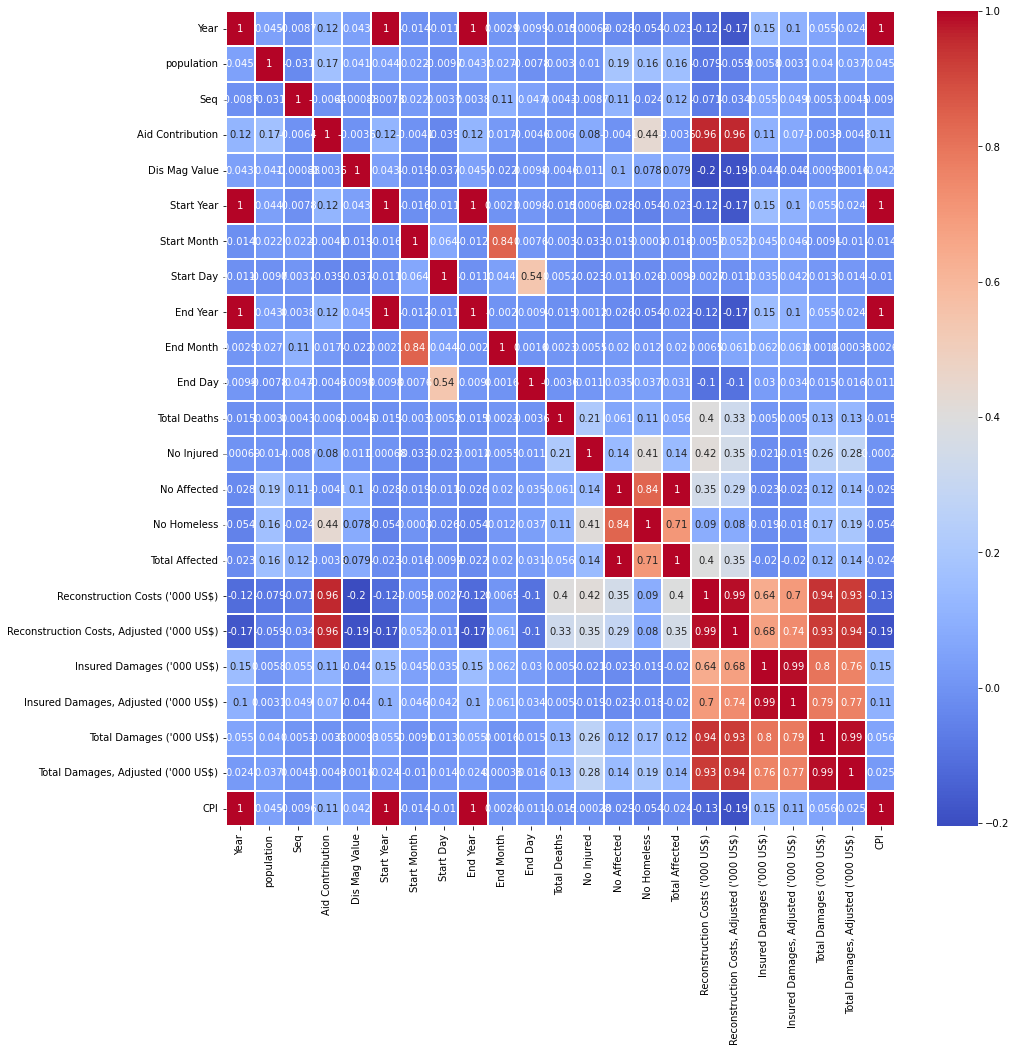

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.02,annot=True,cmap='coolwarm')

### Finding null values in columns

In [20]:
df.isna().sum()

Dis No                                           0
Year                                             0
population                                      74
Seq                                              0
Glide                                        10132
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                              1847
Disaster Subsubtype                          10840
Event Name                                    8774
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                       653
Origin                                        7961
Associated Dis                                8612
Associated Dis2                              11057
OFDA Response                  

#### As per above we are dropping Disaster Subsubtype,Origin,Associated Dis,Associated Dis2,Event Name,Origin,OFDA Response, Appeal, Declaration,Aid Contribution, Dis mag Value,latitude,longitude,Local Time, River Basin,Reconstruction Costs,Reconstruction Costs, Adjusted ,Insured Damages,Insured Damages, Adjusted,Total Damages,Total Damages, Adjusted as these columns have more than 50% observatins with no values

#### Also dropping Dis No, Seq,Glide,ISO , Location, Dis Mag Scale, Adm level, Admin1 Code, Admin2 Code,Geo Locations as these columns are not required for study

In [21]:
df1=df[['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 
         'Country', 'Region', 'Continent',
        'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 
        'No Injured', 'No Affected', 'No Homeless', 'Total Affected','population', 'CPI']]
df1

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Continent,Start Year,Start Month,...,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,population,CPI
0,1991,Natural,Hydrological,Flood,Riverine flood,Austria,Western Europe,Europe,1991,8,...,1991,8,6,5,NaN,NaN,NaN,NaN,7754891,50
1,1991,Natural,Geophysical,Earthquake,Ground movement,Afghanistan,Southern Asia,Asia,1991,4,...,1991,4,18,24,NaN,NaN,NaN,NaN,13299016,50
2,1991,Natural,Meteorological,Storm,Convective storm,Austria,Western Europe,Europe,1991,7,...,1991,7,14,NaN,NaN,NaN,NaN,NaN,7754891,50
3,1991,Natural,Hydrological,Flood,Riverine flood,China,Eastern Asia,Asia,1991,6,...,1991,7,19,1729,32227,206000000,4200000,210232227,1150780000,50
4,1991,Natural,Hydrological,Flood,Riverine flood,Costa Rica,Central America,Americas,1991,8,...,1991,8,22,1,21,165000,20000,185021,3202083,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18988,2021,Natural,Hydrological,Flood,NaN,Serbia,Southern Europe,Europe,2021,1,...,2021,1,12,NaN,NaN,22,NaN,22,6844078,100
18990,2021,Natural,Hydrological,Flood,NaN,South Sudan,Northern Africa,Africa,2021,5,...,2021,10,7,7,NaN,835000,NaN,835000,11381377,100
18991,2021,Natural,Hydrological,Flood,NaN,Pakistan,Southern Asia,Asia,2021,7,...,2021,9,30,194,NaN,NaN,NaN,NaN,225199929,100
18992,2021,Natural,Biological,Epidemic,Parasitic disease,Sudan (the),Northern Africa,Africa,2021,NaN,...,2021,12,NaN,69,2973,NaN,NaN,2973,44909351,100


### Correlation using phi-k library

interval columns not set, guessing: ['Year', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'population', 'CPI']


<AxesSubplot:>

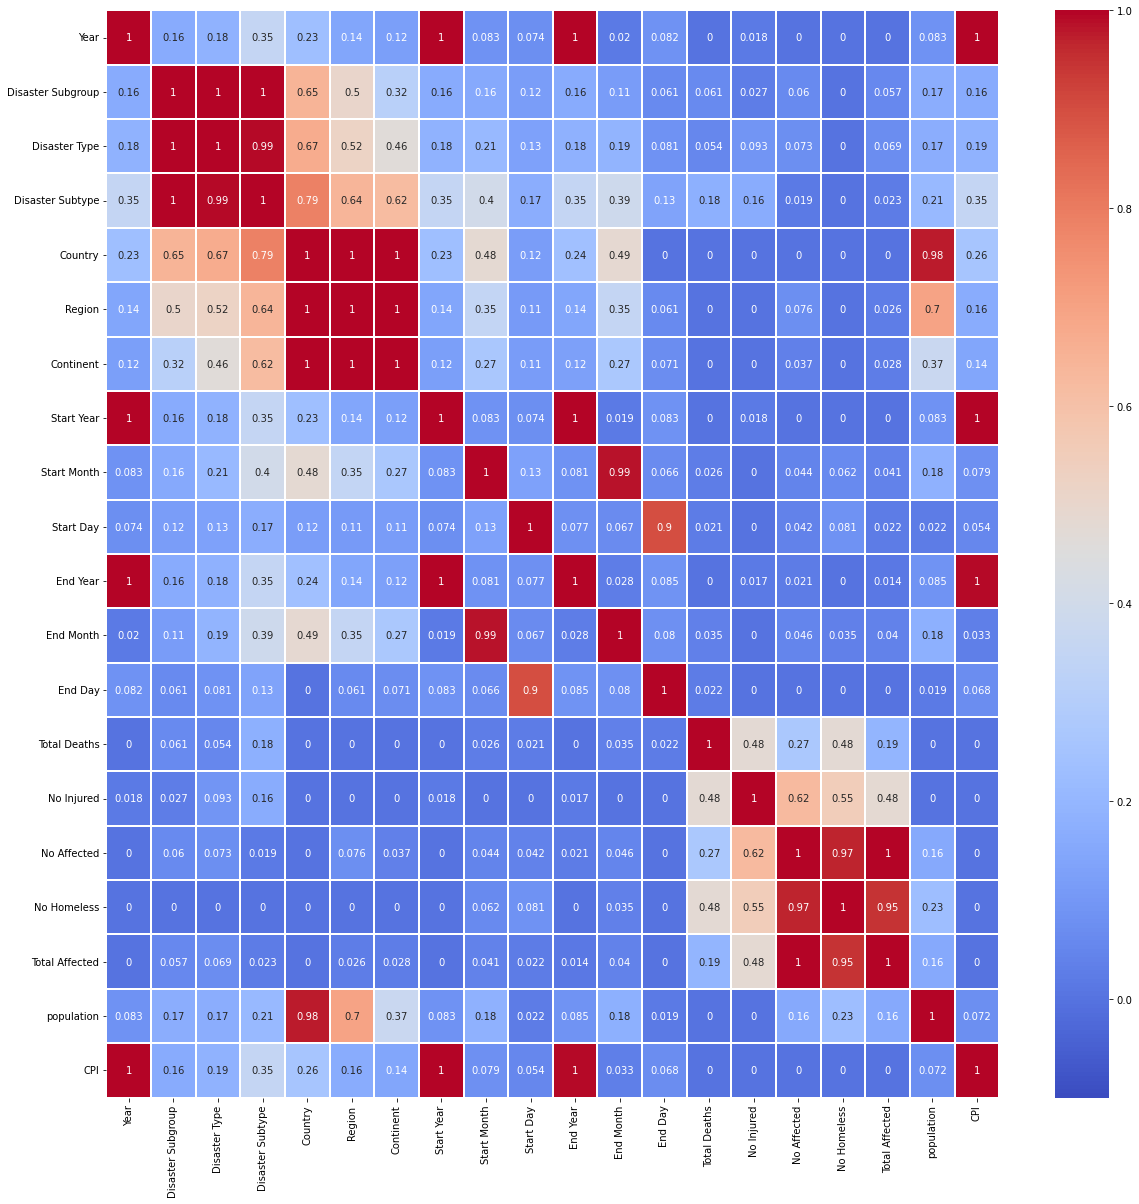

In [22]:
import phik
from phik import resources, report
hm=df1.phik_matrix()
plt.figure(figsize=(20,20))
sns.heatmap(hm,vmin=-0.1,vmax=1,cmap='coolwarm',annot=True,linewidths=0.02)

#### We can see there is high correlation between population and country and positive correlation between region and population which is correct

### Checking  Disaster SubGroup influence on the Total Affected

##### H0:  Disaster subgroups have same Total Affected
##### H1:  Disaster subgroups are affected differently

In [23]:
anov=pd.crosstab(index=df1['Year'],columns=df['Disaster Subgroup'],values=df['Total Affected'],aggfunc=sum)
anov

Disaster Subgroup,Biological,Climatological,Extra-terrestrial,Geophysical,Hydrological,Meteorological
Year,,,,,,
1991,2191107,19102308,NaN,2170979,227887917,23304317
1992,730936,28152190,NaN,1116438,19675404,18502817
1993,462088,3531637,NaN,401742,149406614,18059531
1994,6576697,98082413,NaN,1024369,130092220,38148325
1995,453592,10883833,NaN,1966431,194575642,14860898
1996,697103,4948211,NaN,5496753,182685949,27779306
1997,381794,7026529,NaN,1304203,44686653,15395570
1998,921051,14220939,NaN,3685671,293875498,31057820
1999,1123621,102356375,NaN,6890396,149101359,25827099


#### Since we want to check one factor Disaster Subgroup  over 4 different groups(Zones) we will use one way ANOVA

In [24]:
#Filling null values with 0
for i in anov.columns:
    anov[i]=anov[i].fillna(0)

import scipy.stats as scp
fvalue,pvalue=scp.f_oneway(anov.iloc[:,0],anov.iloc[:,1],anov.iloc[:,2],anov.iloc[:,3],anov.iloc[:,4],anov.iloc[:,5])
fcriteria=scp.f.ppf(1-0.05,5,180)

print('F Statistics=',fvalue)
print('F criteria=',fcriteria)
print('pvalue=',pvalue)
print('significance level=0.05')

F Statistics= 21.11075112365652
F criteria= 2.2643096480525986
pvalue= 1.3904412372324444e-16
significance level=0.05


In [25]:
if fvalue>fcriteria and pvalue<0.05:
   print('Reject H0: Disaster subgroups have same Total Affected')
else:
   print('Reject H1: Disaster subgroups are affected differently')

Reject H0: Disaster subgroups have same Total Affected


### As per the Anova testing Disaster Subgroups  influence  Total Affected eventhough we cannot establish a linear relationship between these variables

## Checking  Disaster Type influence on the Total Affected

##### H0:  Disaster Type have same influence on Total Affected
##### H1:  Disaster Type are affected differently

In [26]:
anov1=pd.crosstab(index=df1['Year'],columns=df['Disaster Type'],values=df['Total Affected'],aggfunc=sum)
anov1

Disaster Type,Animal accident,Drought,Earthquake,Epidemic,Extreme temperature,Flood,Glacial lake outburst,Impact,Insect infestation,Landslide,Mass movement (dry),Storm,Volcanic activity,Wildfire
Year,,,,,,,,,,,,,,
1991,NaN,19102000,977815,2189107,450,227799389,NaN,NaN,2000,88528,0,23303867,1193164,308
1992,NaN,28100000,768316,730936,16000,19597794,NaN,NaN,0,77610,1469,18486817,346653,52190
1993,NaN,3531507,225272,462088,3000760,149250923,NaN,NaN,0,155691,2711,15058771,173759,130
1994,NaN,95015000,791945,6576697,1108184,129783171,NaN,NaN,NaN,309049,NaN,37040141,232424,3067413
1995,NaN,10871994,1940555,453392,535278,193441247,NaN,NaN,200,1134395,NaN,14325620,25876,11839
1996,NaN,4942000,5490181,697103,200,182677013,NaN,NaN,NaN,8936,NaN,27779106,6572,6211
1997,NaN,6973300,1297003,381794,712180,44652702,NaN,NaN,0,33951,NaN,14683390,7200,53229
1998,NaN,14054335,3677863,921051,36386,293662685,NaN,NaN,0,212813,NaN,31021434,7808,166604
1999,NaN,102337545,6856841,1123621,725246,149086068,NaN,NaN,NaN,15291,NaN,25101853,33555,18830


In [27]:
# Filling null value with 0
for i in anov1.columns:
    anov1[i]=anov1[i].fillna(0)

In [28]:
fvalue,pvalue=scp.f_oneway(anov1.iloc[:,1],anov1.iloc[:,2],anov1.iloc[:,3],anov1.iloc[:,4],anov1.iloc[:,5],anov1.iloc[:,6],
anov1.iloc[:,7],anov1.iloc[:,8],anov1.iloc[:,9],anov1.iloc[:,10],anov1.iloc[:,11],anov1.iloc[:,12],anov1.iloc[:,13])
fcriteria=scp.f.ppf(1-0.05,13,420)
print('F Statistics=',fvalue)
print('F criteria=',fcriteria)
print('pvalue=',pvalue)
print('significance level=0.05')

F Statistics= 26.583804671013073
F criteria= 1.7434998279610803
pvalue= 1.1598700010967087e-43
significance level=0.05


In [29]:
if fvalue>fcriteria and pvalue<0.05:
   print('Reject H0:Disaster Type have same influence on Total Affected')
else:
   print('Reject H1: Disaster Type are affected differently')

Reject H0:Disaster Type have same influence on Total Affected


### As per the Anova testing Disaster Type  influence  Total Affected eventhough we cannot establish a linear relationship between these variables

# Preprocesing

In [30]:
df1.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Continent', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'population', 'CPI'],
      dtype='object')

In [31]:
df1.shape

(11743, 21)

## Null Value Handling

In [32]:
df1.isna().sum()

Year                    0
Disaster Group          0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype     1847
Country                 0
Region                  0
Continent               0
Start Year              0
Start Month            98
Start Day            1925
End Year                0
End Month             275
End Day              1851
Total Deaths         3399
No Injured           8670
No Affected          4292
No Homeless          9929
Total Affected       2438
population             74
CPI                     0
dtype: int64

### Backup df1 before handling null values 

In [33]:
df2=df1 

### Since Total affected is the sum of No Injured,No Affected and No Homeless columns,Decided to drop that.

In [34]:
df1=df1.drop(['No Injured','No Affected','No Homeless'],axis=1)

In [35]:
df1.shape

(11743, 18)

### Handling Null values of Total Affected Feature

In [36]:
indx=[]
ind1=df1['Total Affected'].isna()
indx=df1.loc[ind1].index
for i in indx:
    
    df1=df1.drop(i)

### Handling Null values of Disaster Subtype Feature

In [37]:
val=list(df1['Disaster Type'][df1['Disaster Subtype'].isna()].unique())
for i in val:
    if(i not in ['Impact','Animal accident','Glacial lake outburst','Insect infestation']): # dont have any values for Disaster Subtype 
        df1['Disaster Subtype'][(df1['Disaster Type']==i)& (df1['Disaster Subtype'].isna())]=df1['Disaster Subtype'][(df1['Disaster Type']==i)& (df1['Disaster Subtype'].isna())].fillna(df1['Disaster Subtype'][df1['Disaster Type']==i].mode()[0])
    else:
        df1['Disaster Subtype'][(df1['Disaster Type']==i)& (df1['Disaster Subtype'].isna())]=df1['Disaster Subtype'][(df1['Disaster Type']==i)& (df1['Disaster Subtype'].isna())].fillna(i)

In [38]:
df1[df1['Disaster Subtype'].isna()]

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Continent,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,population,CPI


#### All null values has been handled

### Handling Null values of Total Deaths Feature


In [39]:
df1['Total Deaths']=df1['Total Deaths'].fillna(0)

### Handling Null values of StartMonth

In [40]:
indx1=[]
val=df1['Start Month'].isna()
indx1=df1.loc[val].index

import math as math
for i in indx1:
    if(math.isnan(df1.loc[i,'End Month'])):
        df1=df1.drop(i)
        
    else:
        if(df1.loc[i,'Start Year']==df1.loc[i,'End Year']):
               df1.loc[i,'Start Month']=df1.loc[i,'End Month']
        else:
            df1=df1.drop(i)


### Handling Null values of EndMonth

In [41]:
indx2=[]
val=df1['End Month'].isna()
indx2=df1.loc[val].index

for i in indx2:
    if(math.isnan(df1.loc[i,'Start Month'])):
        df1=df1.drop(i)

    else:
        if(df1.loc[i,'Start Year']==df1.loc[i,'End Year']):
                df1.loc[i,'End Month']=df1.loc[i,'Start Month']
        else:
            df1=df1.drop(i)

### Handling Null values of Start Day

In [42]:
day_indx1=[]
val=df1['Start Day'].isna()
day_indx1=df1.loc[val].index

for i in day_indx1:
    if(math.isnan(df1.loc[i,'End Day'])):
          df1=df1.drop(i)
    else:
        if(df1.loc[i,'Start Year']==df1.loc[i,'End Year']):
            if(df1.loc[i,'Start Month']==df1.loc[i,'End Month']):
                    df1.loc[i,'Start Day']=df1.loc[i,'End Day']
            else:
                if(df1.loc[i,'Start Month']!=df1.loc[i,'End Month']):
                    df1=df1.drop(i)
        else:
            if(df1.loc[i,'Start Month']==df1.loc[i,'End Month']):
                df1.loc[i,'Start Day']=df1.loc[i,'End Day']
            else:
                if(df1.loc[i,'Start Month']!=df1.loc[i,'End Month']):
                    df1=df1.drop(i)

### Handling Null Values of EndDay

In [43]:
day_indx2=[]
val=df1['End Day'].isna()
day_indx2=df1.loc[val].index

for i in day_indx2:
    if(math.isnan(df1.loc[i,'Start Day'])):
          df1=df1.drop(i)
    else:
        if(df1.loc[i,'Start Year']==df1.loc[i,'End Year']):
            if(df1.loc[i,'Start Month']==df1.loc[i,'End Month']):
                   df1.loc[i,'End Day']=df1.loc[i,'Start Day']
            else:
                if(df1.loc[i,'Start Month']!=df1.loc[i,'End Month']):
                    df1=df1.drop(i)
                
        else:
            if(df1.loc[i,'Start Month']==df1.loc[i,'End Month']):
                df1.loc[i,'End Day']=df1.loc[i,'Start Day']
            else:
                if(df1.loc[i,'Start Month']!=df1.loc[i,'End Month']):
                    df1=df1.drop(i)

### Merging Start Month,Day,Year as StartDate and End month,Day,Year as EndDate 

In [44]:

ind=df1[df1['Start Month'].isin([2,4,6,9,11])].index
for i in ind:
    if(df1.loc[i,'Start Day']>30):
        df1.loc[i,'Start Day']=30

In [45]:
ind=df1[df1['Start Month'].isin([2])].index
for i in ind:
    if(df1.loc[i,'Start Day']>28):
        df1.loc[i,'Start Day']=28

In [46]:

ind=df1[df1['End Month'].isin([2,4,6,9,11])].index
for i in ind:
    if(df1.loc[i,'End Day']>30):
        df1.loc[i,'End Day']=30
        

In [47]:
ind=df1[df1['End Month'].isin([2])].index
for i in ind:
    if(df1.loc[i,'End Day']>28):
        df1.loc[i,'End Day']=28

In [48]:
stdate = df1[["Start Day", "Start Month", "Start Year"]].copy()
stdate.columns = ["day", "month", "year"]
df1['Start Date']=pd.to_datetime(stdate,dayfirst=True)


In [49]:
endate = df1[["End Day", "End Month", "End Year"]].copy()
endate.columns = ["day", "month", "year"]
df1['End Date']=pd.to_datetime(endate,dayfirst=True)
        

### Adding a new column Duration

In [50]:
datediff=df1['End Date']-df1['Start Date']

In [51]:
import datetime
df1['Duration']= (df1['End Date']-df1['Start Date'])+ datetime.timedelta(days=1)


In [52]:
df1['Duration']=(df1['Duration']/ np.timedelta64(1, 'D')).astype(int)

Dropping the columns'Start Year','Start Month','Start Day','End Year','End Month','End Day','Start Date','End Date' since duration is added

In [53]:
df1.drop(['Start Year','Start Month','Start Day','End Year','End Month','End Day','Start Date','End Date'],axis=1,inplace=True)

In [54]:
df1.shape

(7851, 13)

### Checking null values in columns

In [55]:
df1.isna().sum()

Year                  0
Disaster Group        0
Disaster Subgroup     0
Disaster Type         0
Disaster Subtype      0
Country               0
Region                0
Continent             0
Total Deaths          0
Total Affected        0
population           47
CPI                   0
Duration              0
dtype: int64

#### Population has 47 null value data.Handling data which already has a sample population

In [56]:
#Taking backup of DF
pop=df1[df1['population'].isna()]
for i in pop['Country']:
    df1['population'][(df1['Country']==i) &(df1['population'].isna())]=df1['population'][(df1['Country']==i) &(df1['population'].isna())].fillna(np.max(df1['population'][df1['Country']==i]))


In [57]:
df1.isna().sum()

Year                  0
Disaster Group        0
Disaster Subgroup     0
Disaster Type         0
Disaster Subtype      0
Country               0
Region                0
Continent             0
Total Deaths          0
Total Affected        0
population           30
CPI                   0
Duration              0
dtype: int64

### Dropping remaining 30 rows. Since population is not available

In [58]:
index=df1[df1['population'].isna()].index
df1=df1.drop(index)

In [59]:
df1.isna().sum()

Year                 0
Disaster Group       0
Disaster Subgroup    0
Disaster Type        0
Disaster Subtype     0
Country              0
Region               0
Continent            0
Total Deaths         0
Total Affected       0
population           0
CPI                  0
Duration             0
dtype: int64

#### All null values has been handled

In [60]:
df1.shape

(7821, 13)

## Encoding

In [61]:
df1.nunique()

Year                   31
Disaster Group          1
Disaster Subgroup       6
Disaster Type          14
Disaster Subtype       29
Country               203
Region                 23
Continent               5
Total Deaths          496
Total Affected       3816
population           2851
CPI                    31
Duration              220
dtype: int64

In [62]:
# we will split the data set to predictor and features
df3=df1
X=df1.drop(['Total Affected','Disaster Group','CPI','Country'],axis=1)
y=df1['Total Affected']
X

,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Region,Continent,Total Deaths,population,Duration
3,1991,Hydrological,Flood,Riverine flood,Eastern Asia,Asia,1729,1150780000,49
4,1991,Hydrological,Flood,Riverine flood,Central America,Americas,1,3202083,10
5,1991,Geophysical,Earthquake,Ground movement,Central America,Americas,47,3202083,1
7,1991,Meteorological,Storm,Convective storm,Eastern Asia,Asia,69,1150780000,1
9,1991,Meteorological,Storm,Tropical cyclone,Southern Asia,Asia,138866,105599125,12
...,...,...,...,...,...,...,...,...,...
18974,2021,Hydrological,Flood,Riverine flood,Western Asia,Asia,11,30490639,23
18975,2021,Hydrological,Flood,Riverine flood,Southern Africa,Africa,31,60041996,15
18976,2021,Biological,Epidemic,Viral disease,Middle Africa,Africa,131,92377986,7
18988,2021,Hydrological,Flood,Riverine flood,Southern Europe,Europe,0,6844078,2


### One Hot Encoding

In [63]:
# Doing OneHot Encoding for the columns  'Disaster Subgroup','Disaster Type','Continent','Disaster Subtype','Region'
from sklearn.preprocessing import OneHotEncoder
oh_enc=OneHotEncoder(sparse=False, categories='auto')
one_hot=oh_enc.fit_transform(X[['Disaster Subgroup','Disaster Type','Disaster Subtype','Region','Continent']])
features=oh_enc.get_feature_names(['Disaster Subgroup','Disaster Type','Disaster Subtype','Region','Continent'])
one_hot=pd.DataFrame(one_hot,X.index,columns=features)
X=pd.concat([X,one_hot],axis=1,join='inner')
X=X.drop(['Disaster Subgroup','Disaster Type','Disaster Subtype','Region','Continent'],axis=1)
X


,Year,Total Deaths,population,Duration,Disaster Subgroup_Biological,Disaster Subgroup_Climatological,Disaster Subgroup_Extra-terrestrial,Disaster Subgroup_Geophysical,Disaster Subgroup_Hydrological,Disaster Subgroup_Meteorological,...,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania
3,1991,1729,1150780000,49,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1991,1,3202083,10,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,1991,47,3202083,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1991,69,1150780000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,1991,138866,105599125,12,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2021,11,30490639,23,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
18975,2021,31,60041996,15,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
18976,2021,131,92377986,7,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18988,2021,0,6844078,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


### Logarithmic Transformation of Dependent Variable y

In [64]:
y= np.log(y)

In [65]:
X

,Year,Total Deaths,population,Duration,Disaster Subgroup_Biological,Disaster Subgroup_Climatological,Disaster Subgroup_Extra-terrestrial,Disaster Subgroup_Geophysical,Disaster Subgroup_Hydrological,Disaster Subgroup_Meteorological,...,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania
3,1991,1729,1150780000,49,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1991,1,3202083,10,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,1991,47,3202083,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1991,69,1150780000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,1991,138866,105599125,12,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2021,11,30490639,23,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
18975,2021,31,60041996,15,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
18976,2021,131,92377986,7,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18988,2021,0,6844078,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# Standard Scaling

In [66]:
# Standard scaling is done for the columns 'Total Deaths','population','Duration'

from sklearn.preprocessing import StandardScaler
st_scale1= StandardScaler()
X.loc[:,['Total Deaths','population','Duration']]=st_scale1.fit_transform(np.array(X.loc[:,['Total Deaths','population','Duration']]))
pd.set_option('display.float_format', lambda x: '%f'% x)

In [67]:
X

,Year,Total Deaths,population,Duration,Disaster Subgroup_Biological,Disaster Subgroup_Climatological,Disaster Subgroup_Extra-terrestrial,Disaster Subgroup_Geophysical,Disaster Subgroup_Hydrological,Disaster Subgroup_Meteorological,...,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania
3,1991,0.372045,2.321261,0.868700,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,1991,-0.045950,-0.523376,-0.076066,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
5,1991,-0.034823,-0.523376,-0.294089,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
7,1991,-0.029501,2.321261,-0.294089,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
9,1991,33.544842,-0.269553,-0.027616,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2021,-0.043531,-0.455733,0.238856,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
18975,2021,-0.038693,-0.382481,0.045058,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
18976,2021,-0.014504,-0.302326,-0.148740,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
18988,2021,-0.046192,-0.514349,-0.269864,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


# Train Test Split of Dataset

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.20)

# Fitting Linear Regression Model

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score,max_error
lr= linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred).round())
print('MAE:',mean_absolute_error(y_test,y_pred).round())


print(model.score(X_test,y_test))
print(r2_score(y_test,y_pred))
print(explained_variance_score(y_test, y_pred))
print(max_error(y_test,y_pred))


MSE: 8.0
MAE: 2.0
0.23909462067774356
0.23909462067774356
0.23921709331331564
19.955966961389127


# Fitting RandomForest Regression Model

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_mod = RandomForestRegressor(n_estimators = 100, random_state = 42)
model=rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)

In [71]:
print('MSE:',mean_squared_error(y_test,y_pred).round())
print('MAE:',mean_absolute_error(y_test,y_pred).round())

print(model.score(X_test,y_test))#R2 score
print(r2_score(y_test,y_pred))
print(explained_variance_score(y_test, y_pred))
print(max_error(y_test,y_pred))

MSE: 6.0
MAE: 2.0
0.42114158809186797
0.42114158809186797
0.42117080002076535
10.504126782693696


### Findings: It has been observed that the RandomForestRegressor is the best fit model compared to the linear Regressor

# Hyper Parameter Tuning

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_hyper = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_hyper,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)

print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')


### Random forest model after hyperparameter tuning

In [72]:
rf_mod = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 70, bootstrap=True) 
model=rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)

In [73]:
print('MSE:',mean_squared_error(y_test,y_pred).round())
print('MAE:',mean_absolute_error(y_test,y_pred).round())

print(model.score(X_test,y_test))#R2 score
print(r2_score(y_test,y_pred))
print(explained_variance_score(y_test, y_pred))
print(max_error(y_test,y_pred))

MSE: 5.0
MAE: 2.0
0.4596546800987501
0.4596546800987501
0.4596554080214058
9.123598147658566


## Findings

- After splitting the data for model fitting started with linear regression and Randomforest regressor
- Linear Regression showed MSE 8 and MAE 2 with r2 0.23
- Random forest algorith gave MSE 6 and MAE 2 with r2 0.42
- Random forest after hypertuning gave MSE 5 and MAE 2 with r2 0.46
- random forest gives a better prediction for the data set